In [34]:
import pandas as pd
import os 
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
data = pd.read_csv(os.path.join("../engine", "data", "IID.csv"))
data_1 = pd.read_csv(os.path.join("../engine", "data", "IID_1.csv"))
data_2 = pd.read_csv(os.path.join("../engine", "data", "IID_2.csv"))
data_1_noniid = pd.read_csv(os.path.join("../engine", "data", "NON_IID_FL_1.csv"))
data_2_noniid = pd.read_csv(os.path.join("../engine", "data", "NON_IID_FL_2.csv"))

<Axes: >

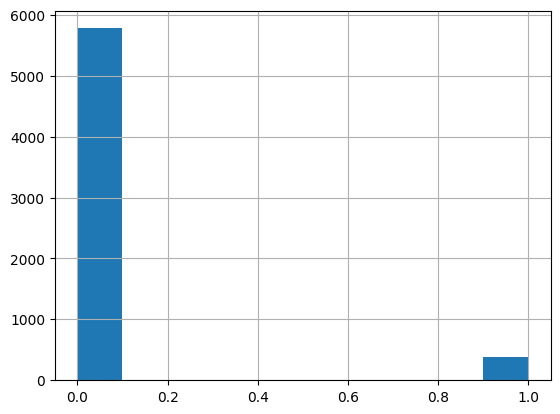

In [4]:
data_1.Fraud.hist()

<Axes: >

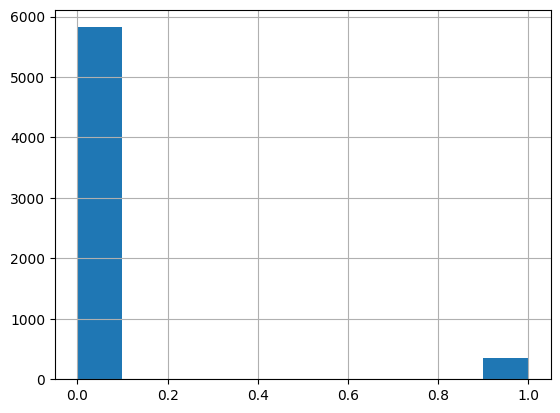

In [5]:
data_2.Fraud.hist()

<Axes: >

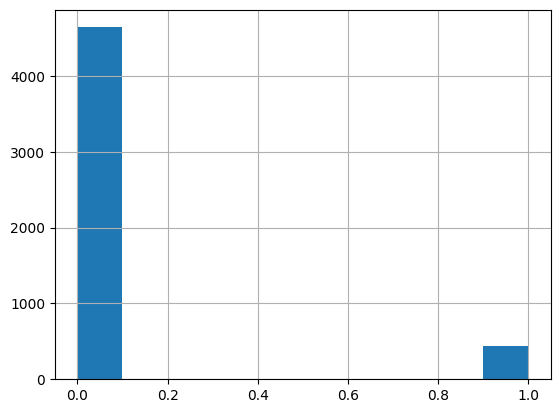

In [6]:
data_1_noniid.Fraud.hist()

<Axes: >

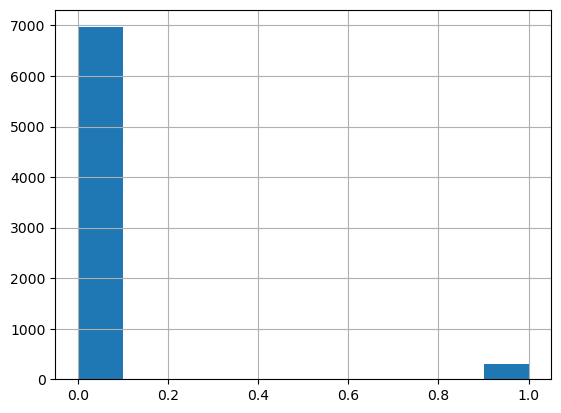

In [21]:
data_2_noniid.Fraud.hist()

In [ ]:
print(data_1_noniid.describe())

print(data_2_noniid.describe())



             Month  WeekOfMonth    DayOfWeek         Make  AccidentArea  \
count  5080.000000  5080.000000  5080.000000  5080.000000   5080.000000   
mean      5.555917     2.781197     2.836238    10.125664      0.936238   
std       4.111771     2.694894     3.115307     5.844552      2.395560   
min      -6.641382    -6.449888    -8.265710    -5.806112    -10.335309   
25%       2.502822     0.922431     0.671637     5.682444     -0.699633   
50%       5.619410     2.804796     2.784995    10.458192      0.971009   
75%       8.558691     4.617496     5.003311    14.802664      2.554935   
max      18.511430    11.509973    14.564992    24.446455     10.514968   

       DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed          Sex  \
count       5080.000000   5080.000000         5080.000000  5080.000000   
mean           4.233657      6.609983            2.715136     0.744974   
std            3.243622      4.142643            2.657385     2.367029   
min           -8.700726     

: 

In [8]:
chunks = np.array_split(data, 6)

c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
print(chunks[0].shape, chunks[1].shape, chunks[2].shape, chunks[3].shape, chunks[4].shape, chunks[5].shape) 

(2056, 34) (2056, 34) (2056, 34) (2056, 34) (2056, 34) (2056, 34)


In [13]:
df1, df2, df3, df4, df5, df6 = chunks[0], chunks[1], chunks[2], chunks[3], chunks[4], chunks[5]

<Axes: >

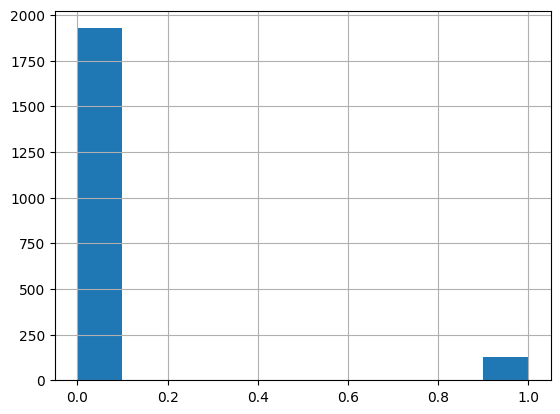

In [15]:
df1.Fraud.hist()

In [ ]:
df1.to_csv(os.path.join("../engine", "data", "df1.csv"), index=False), df2.to_csv(os.path.join("../engine", "data","df2.csv"), index=False), df3.to_csv(os.path.join("../engine", "data","df3.csv"), index=False), df4.to_csv(os.path.join("../engine", "data","df4.csv"), index=False), df5.to_csv(os.path.join("../engine", "data","df5.csv"), index=False), df6.to_csv(os.path.join("../engine", "data","df6.csv"), index=False)  

(None, None, None, None, None, None)

In [6]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.fc = nn.Linear(input_dim, 2)

    def forward(self, x):
        return self.fc(x)


In [11]:
model = LogisticRegressionModel(input_dim=10)
print(type(model))

<class '__main__.LogisticRegressionModel'>


In [9]:
model.__dict__

{'training': True,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {'fc': Linear(in_features=10, out_features=2, bias=True)}}

In [2]:
datanoniid = pd.read_csv(os.path.join("../engine", "data", "NON_IID.csv"))

In [37]:
print(data.Fraud.value_counts(), data.columns)
data.shape 


Fraud
0    11604
1      732
Name: count, dtype: int64 Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy', 'AgeGroup',
       'VehiclePrice_Cat', 'Fraud'],
      dtype='object')


(12336, 34)

In [33]:
data[200:300].shape 

(100, 34)

In [43]:
(data.iloc[100:].groupby(data.Fraud)).get_group(1)

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
137        0            1          5    17             1                 1   
150        2            4          4    13             0                 7   
194        7            3          3    13             1                 2   
200        1            3          0     0             1                 2   
213        1            2          1     6             1                 5   
...      ...          ...        ...   ...           ...               ...   
12269      2            3          4     2             1                 7   
12277      1            4          0     6             1                 6   
12280      1            3          4    17             1                 1   
12285      7            5          6    13             1                 6   
12333     11            4          0    17             1                 1   

       MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  \
137               1                   2    1              1  ...   
150               5                   1    1              1  ...   
194               8                   4    1              1  ...   
200              12                   1    1              2  ...   
213               2                   3    1              1  ...   
...             ...                 ...  ...            ...  ...   
12269             3                   4    1              1  ...   
12277             2                   5    1              1  ...   
12280             2                   3    1              2  ...   
12285             7                   2    1              2  ...   
12333            11                   4    1              1  ...   

       WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  \
137                 0          0                    0                    0   
150                 0          0                    3                    0   
194                 0          0                    0                    0   
200                 0          0                    1                    0   
213                 0          0                    6                    0   
...               ...        ...                  ...                  ...   
12269               0          0                    6                    0   
12277               0          0                    0                    0   
12280               0          0                    0                    0   
12285               0          0                    0                    0   
12333               0          1                    6                    0   

       NumberOfCars  Year  BasePolicy  AgeGroup  VehiclePrice_Cat  Fraud  
137               1     0           0      -1.0                 1      1  
150               1     0           1      -1.0                 1      1  
194               1     1           0      -1.0                 2      1  
200               1     0           2      -1.0                 1      1  
213               1     2           1      -1.0                 1      1  
...             ...   ...         ...       ...               ...    ...  
12269             1     1           1      -1.0                 1      1  
12277             1     0           0      -1.0                 0      1  
12280             1     0           0      -1.0                 1      1  
12285             1     1           0      -1.0                 1      1  
12333             3     1           1      -1.0                 1      1  

[722 rows x 34 columns]

In [ ]:
def feature_skew_split(df, feature_cols, target_col=None, n_clients=6, n_clusters=10, seed=42):
    np.random.seed(seed)
  
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    X_scaled = StandardScaler().fit_transform(df_shuffled[feature_cols].values)
    
    clusters = KMeans(n_clusters=n_clusters, random_state=seed).fit_predict(X_scaled)
    df_shuffled['cluster'] = clusters
    
    cluster_counts = (df_shuffled.groupby('cluster').size()
                      .reset_index(name='count')
                      .sort_values(by='count', ascending=False)
                      .reset_index(drop=True))
    
    
    client_cluster_num = [n_clusters // n_clients + (1 if i < n_clusters % n_clients else 0) for i in range(n_clients)]
   
    cluster_assignment = {
        cluster_counts.loc[idx, 'cluster']: client_id 
        for client_id in range(n_clients)
        for idx in range(sum(client_cluster_num[:client_id]), sum(client_cluster_num[:client_id]) + client_cluster_num[client_id])
    }

    client_dfs = {
        client_id: df_shuffled[df_shuffled['cluster'].map(cluster_assignment) == client_id].drop(columns='cluster').copy()
        for client_id in range(n_clients)
    }
    return client_dfs

In [ ]:
col = datanoniid.columns.to_list()
del col[0]


In [ ]:
client_datasets = feature_skew_split(datanoniid, feature_cols=col[:10], target_col='target', n_clients=6, n_clusters=10, seed=42)

for client, data in client_datasets.items():
    print(f"Клиент {client}: {len(data)} примеров")

Клиент 0: 4715 примеров
Клиент 1: 2461 примеров
Клиент 2: 2325 примеров
Клиент 3: 1062 примеров
Клиент 4: 993 примеров
Клиент 5: 780 примеров


In [22]:
[print(client_datasets[i].Fraud.value_counts()) for i in client_datasets.keys()]

Fraud
0    4405
1     310
Name: count, dtype: int64
Fraud
0    2311
1     150
Name: count, dtype: int64
Fraud
0    2179
1     146
Name: count, dtype: int64
Fraud
0    999
1     63
Name: count, dtype: int64
Fraud
0    955
1     38
Name: count, dtype: int64
Fraud
0    755
1     25
Name: count, dtype: int64


[None, None, None, None, None, None]

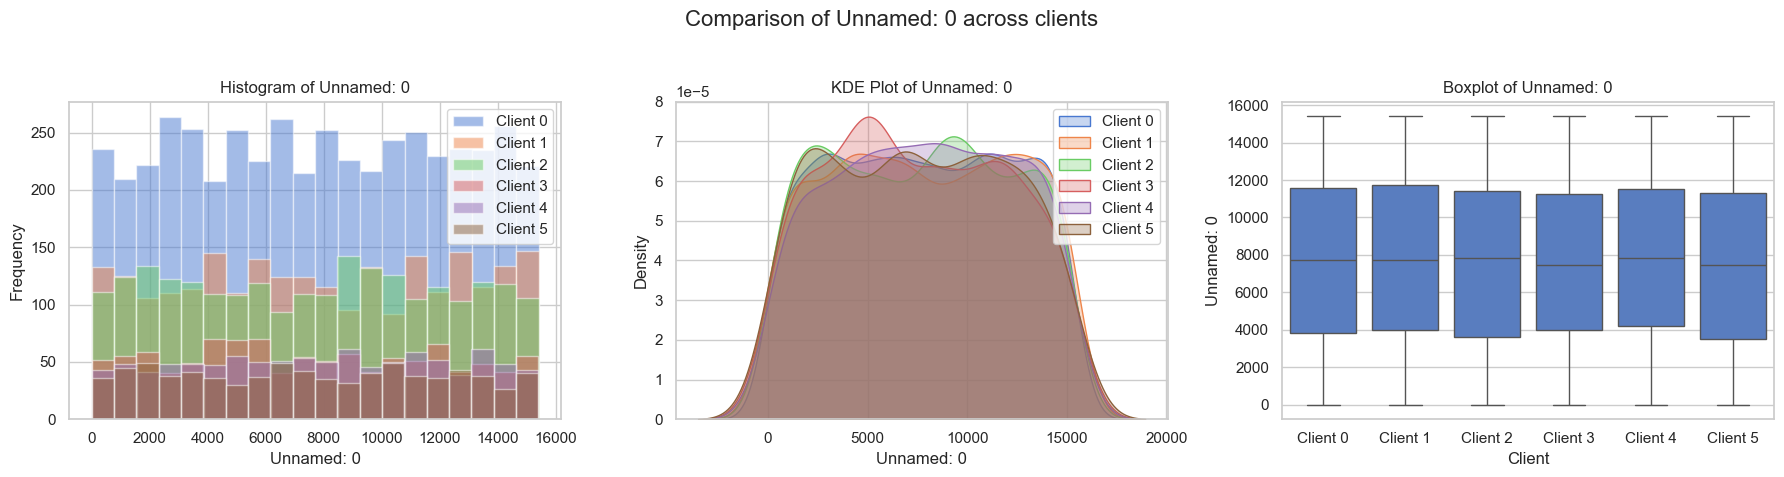

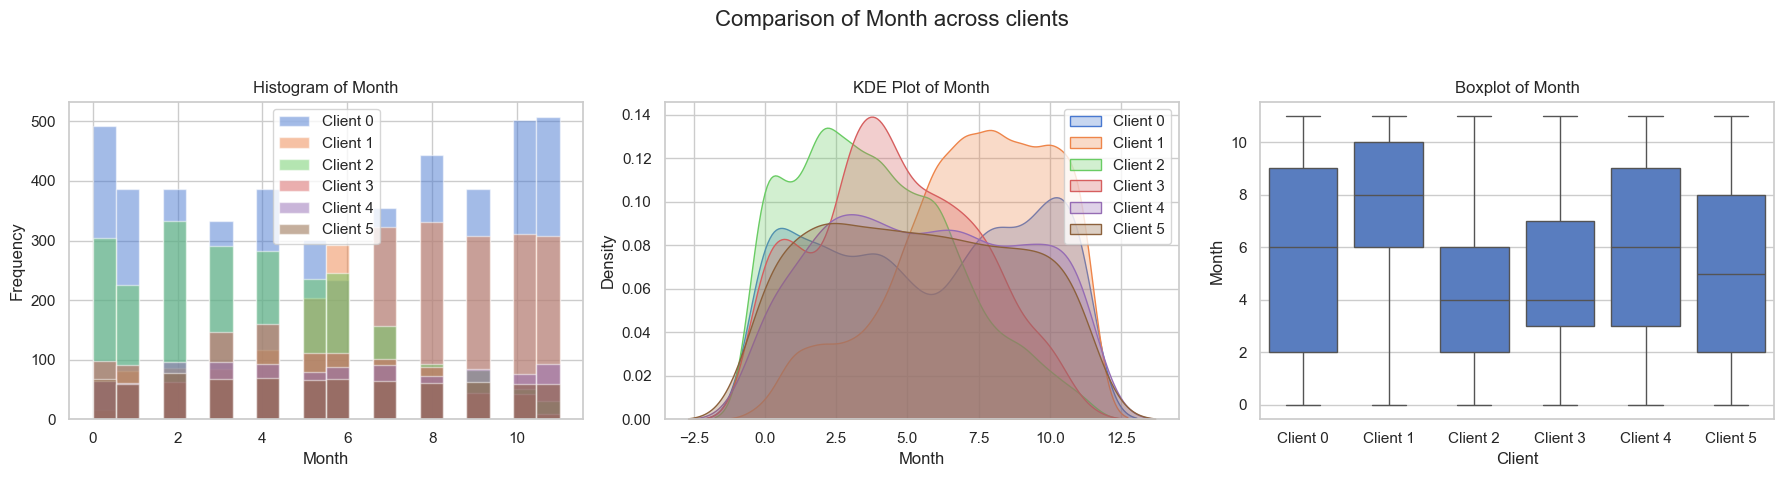

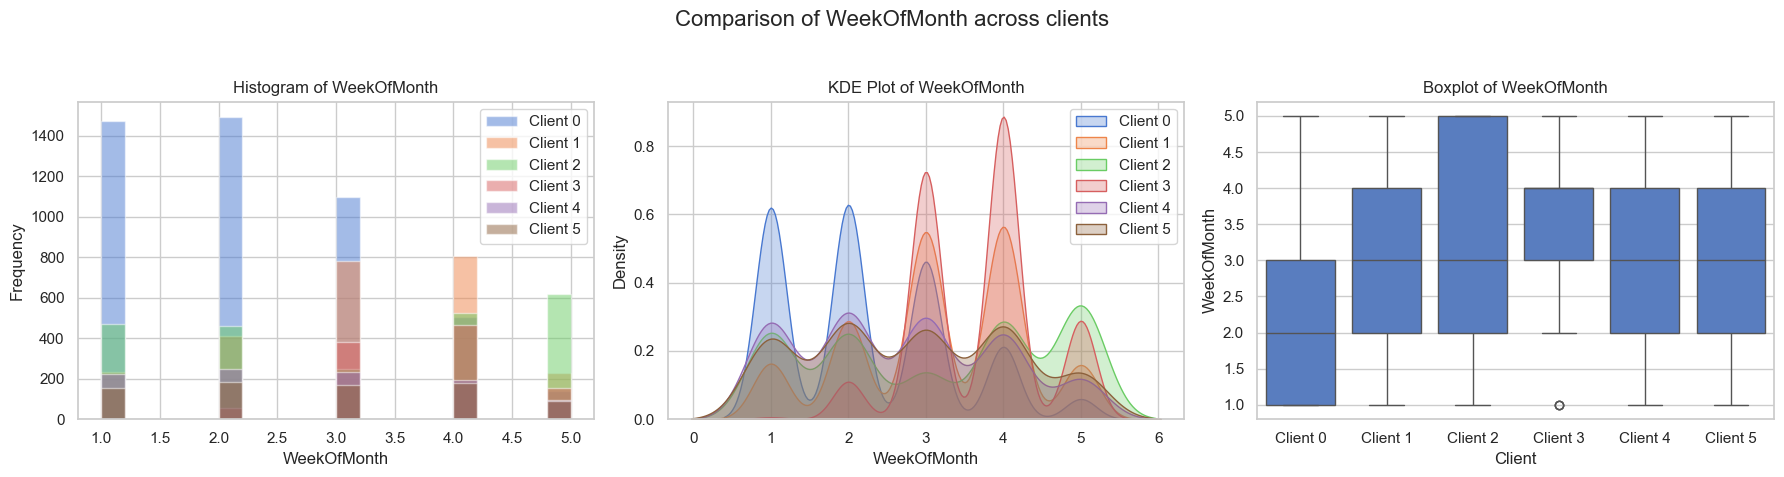

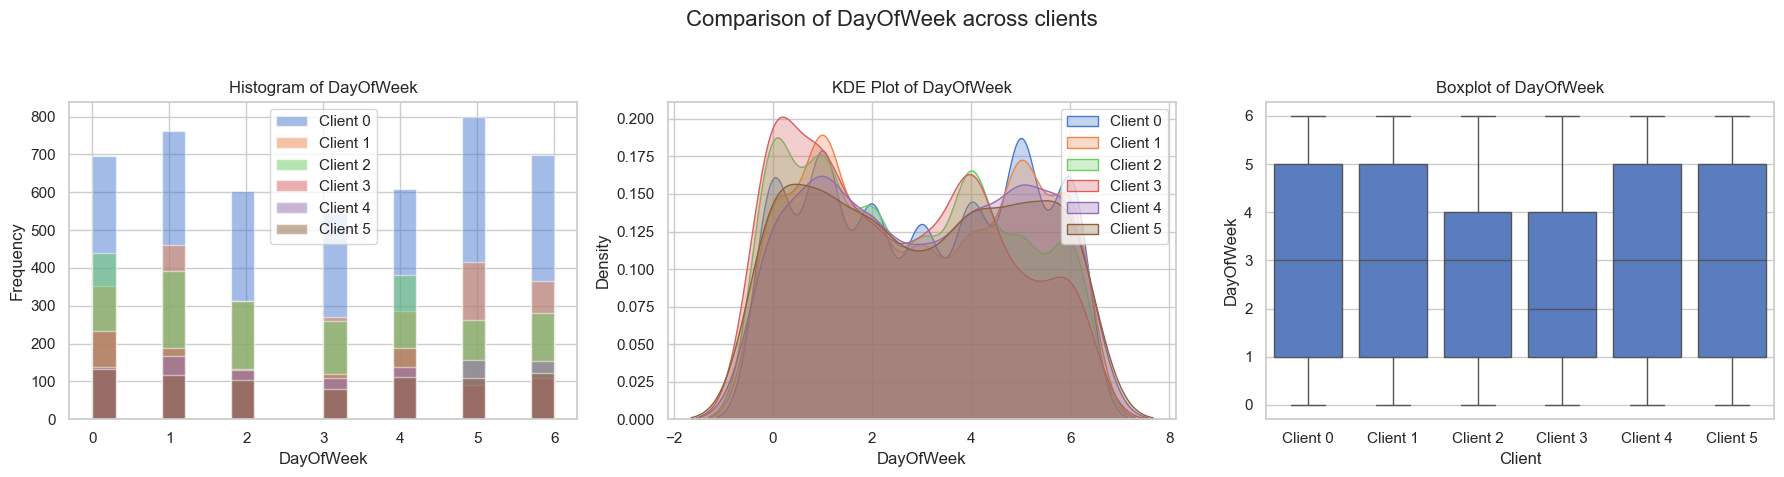

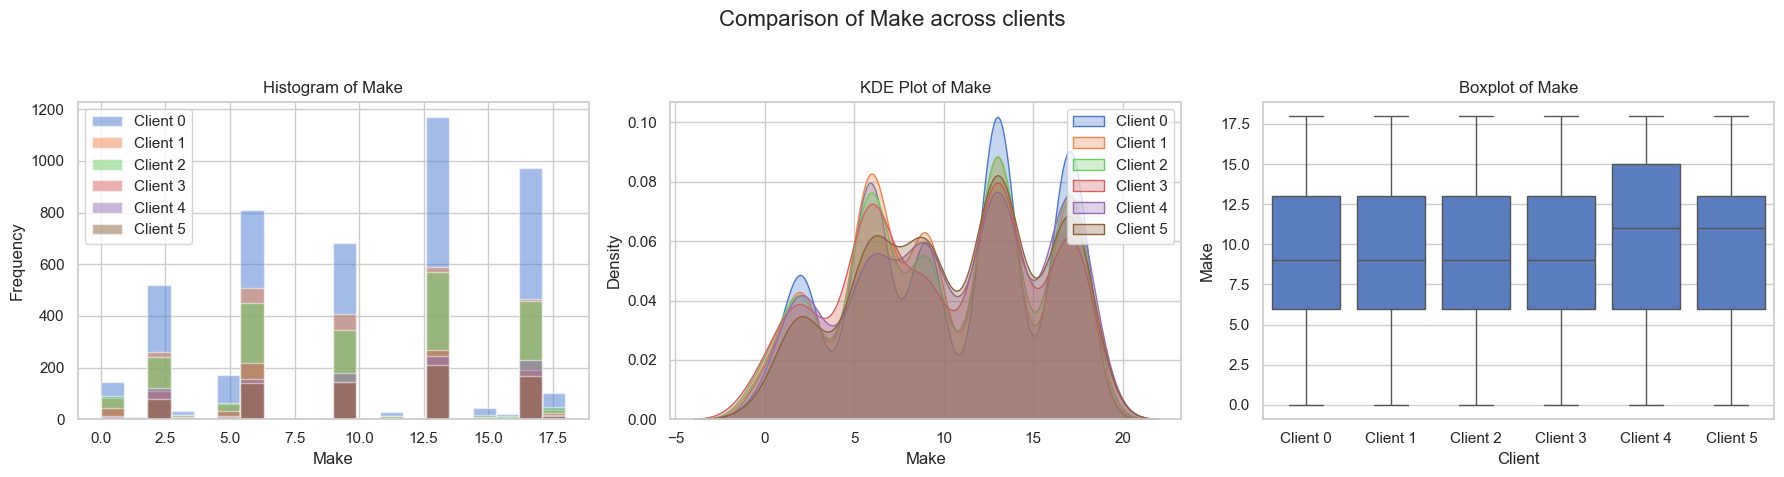

C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:1

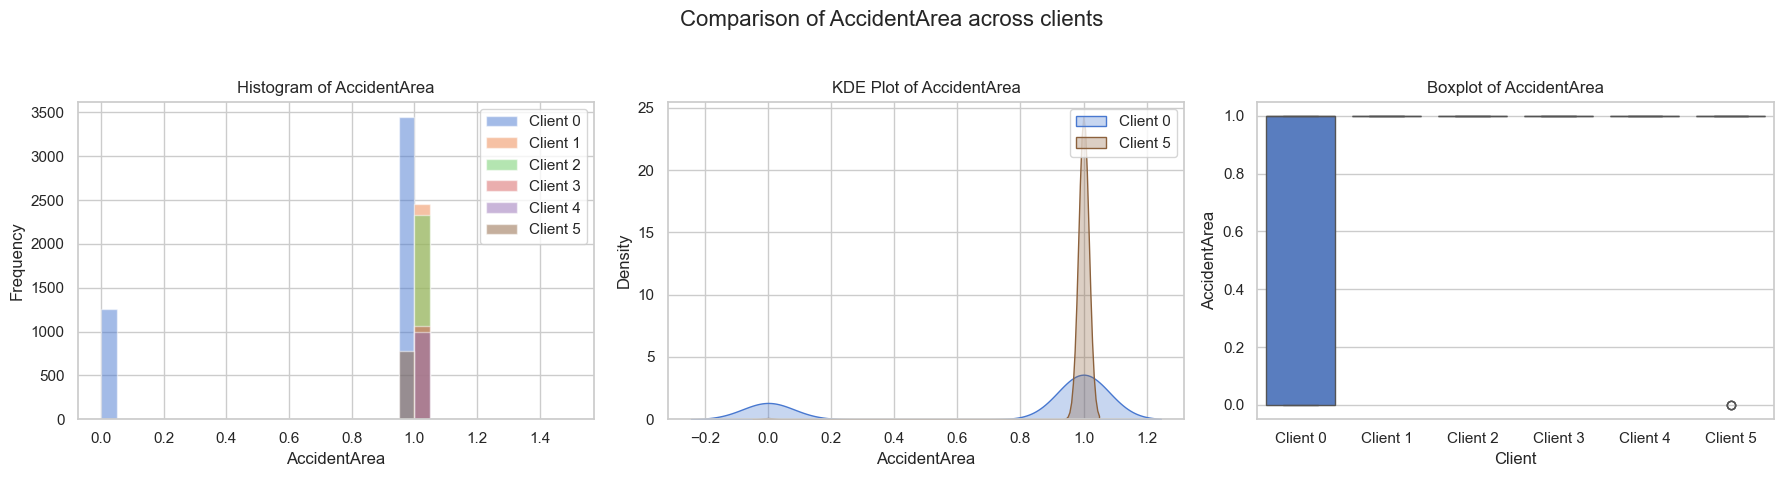

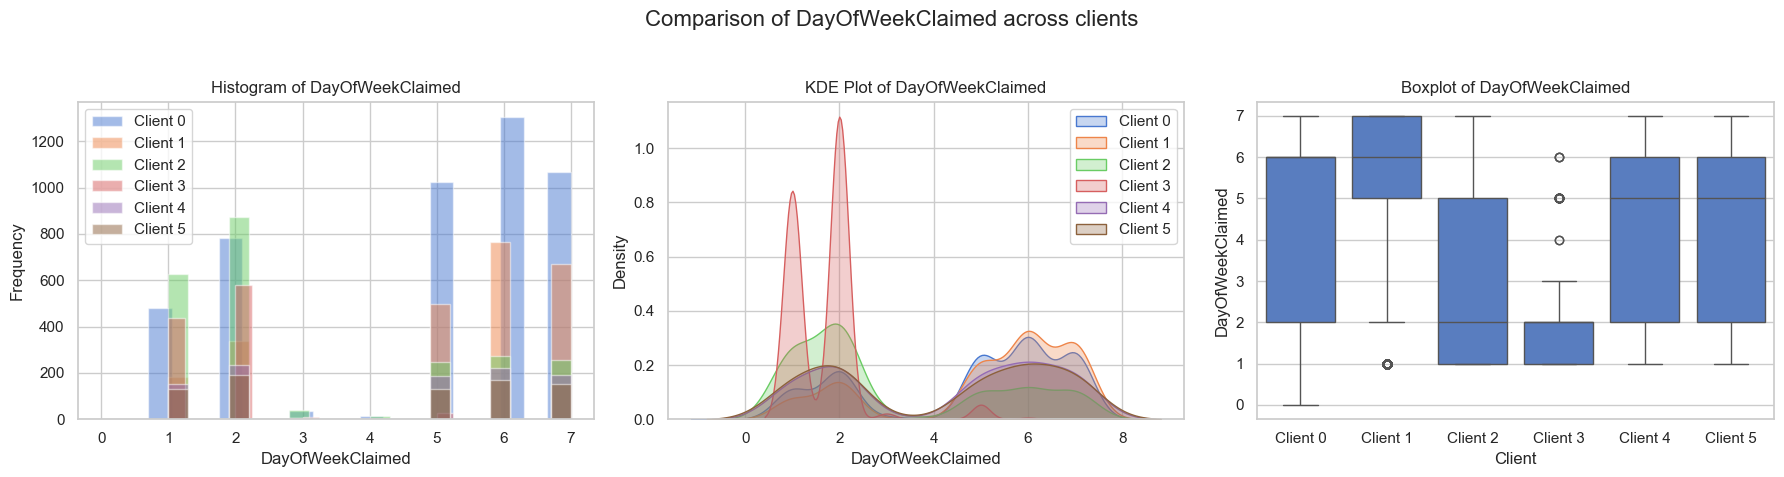

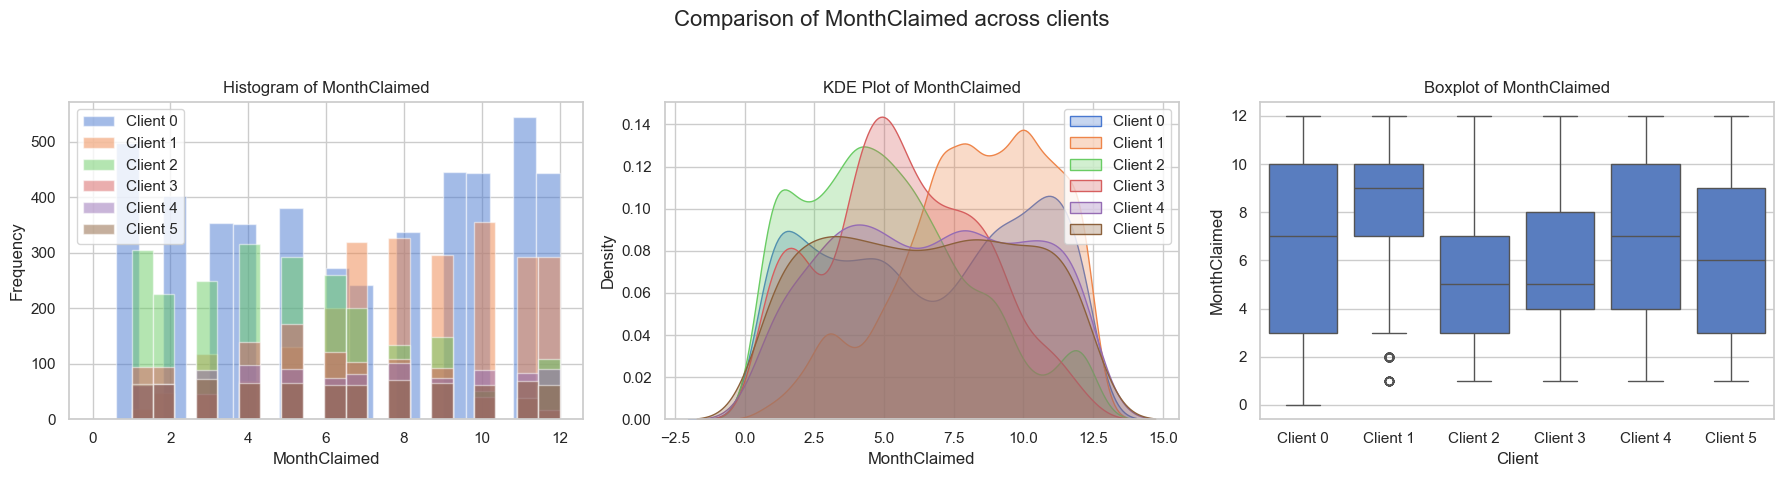

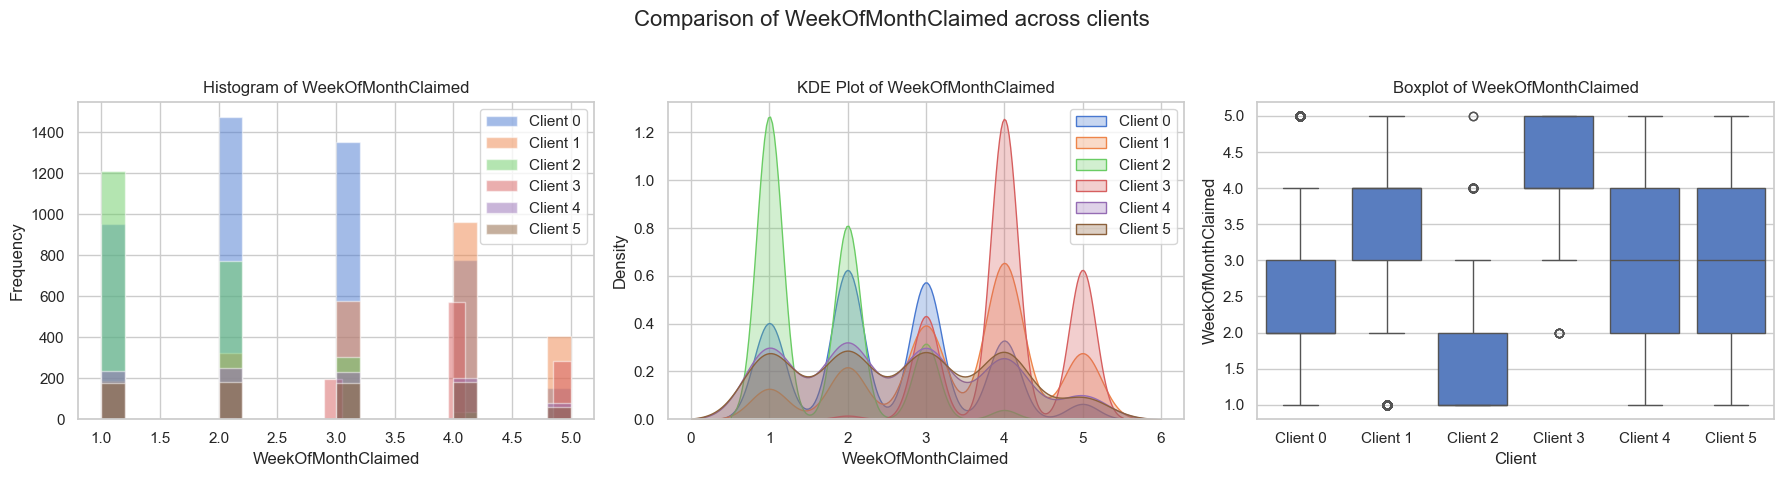

C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:1

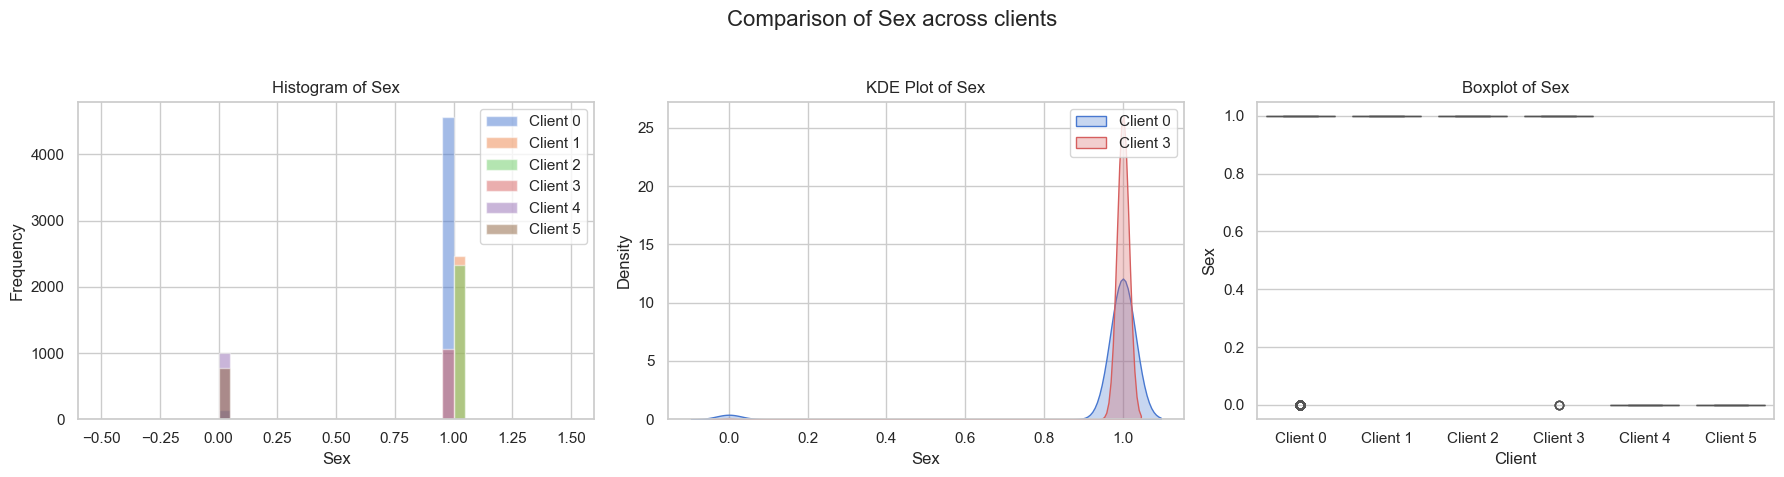

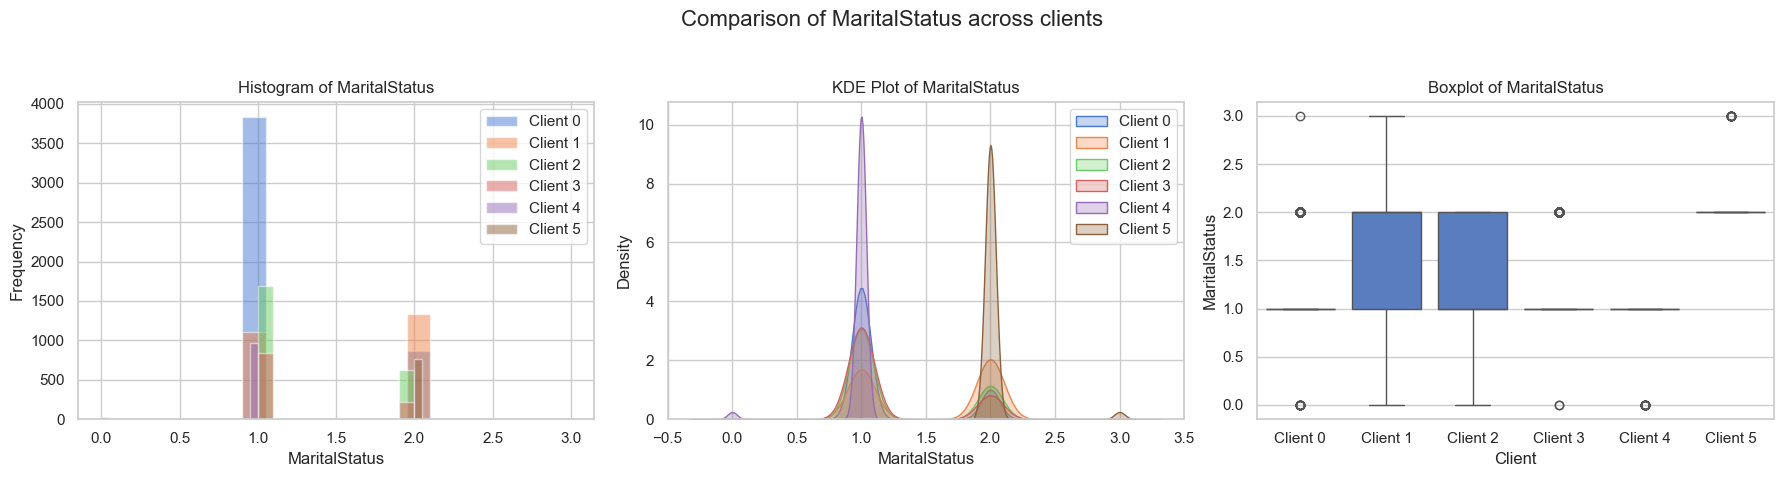

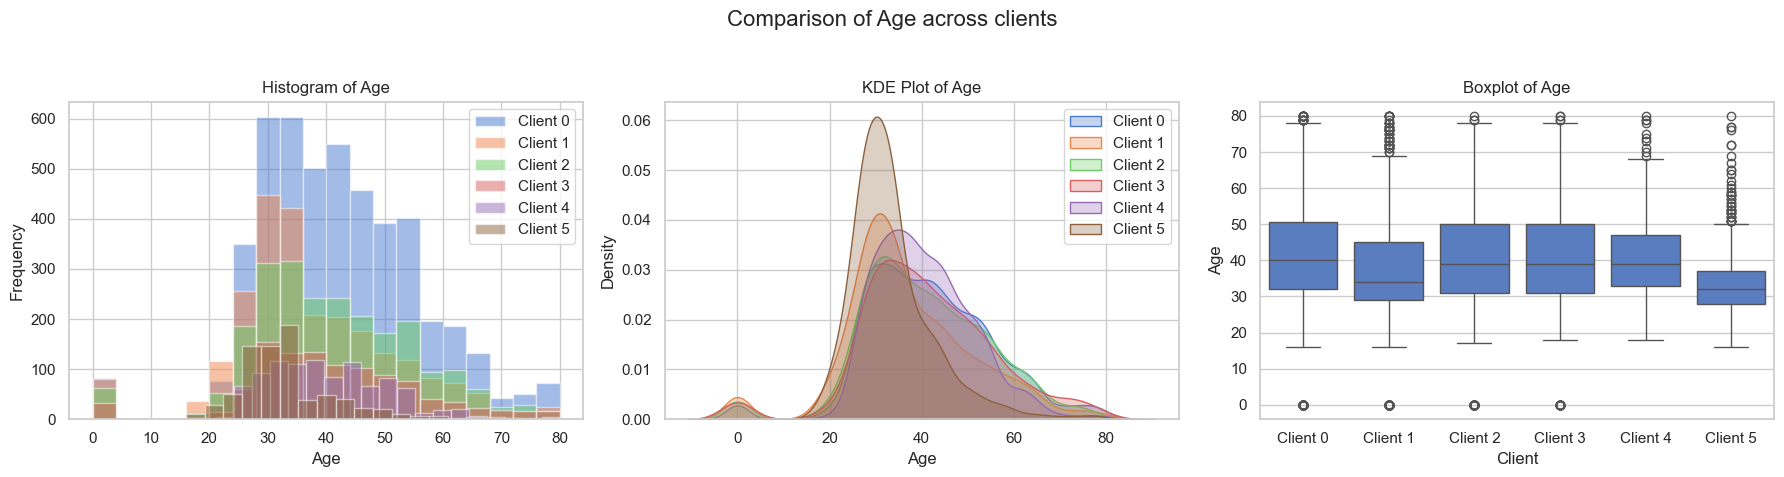

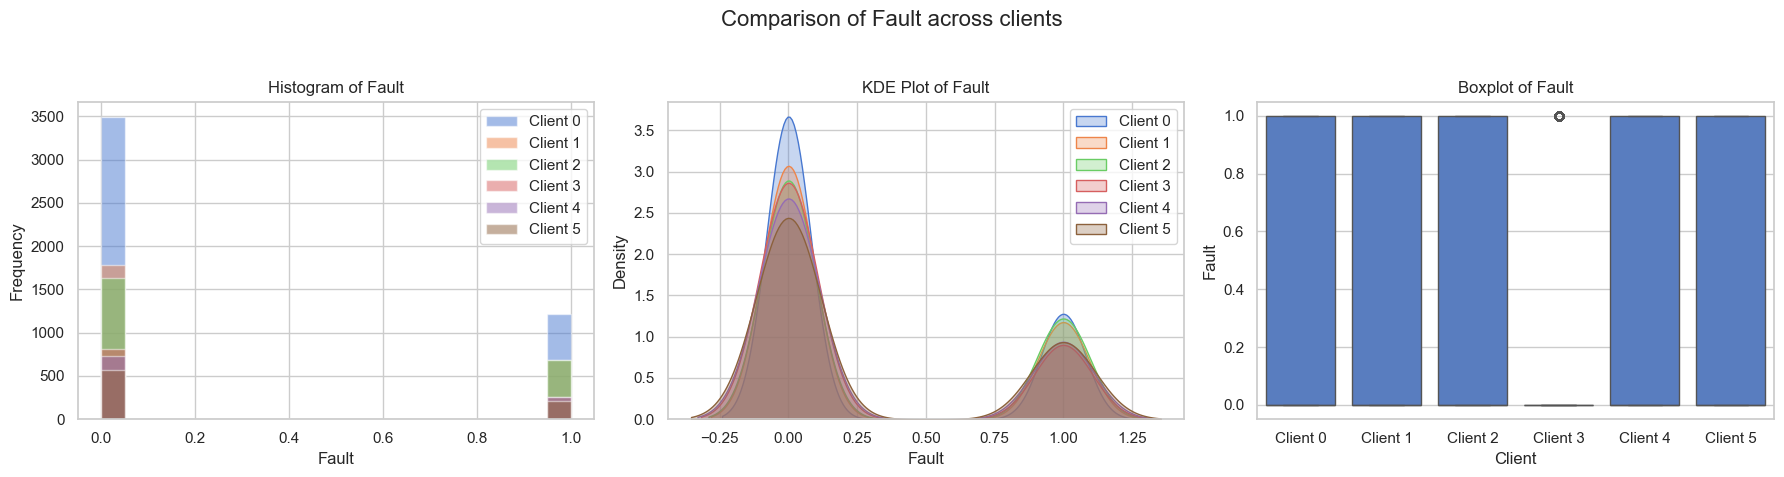

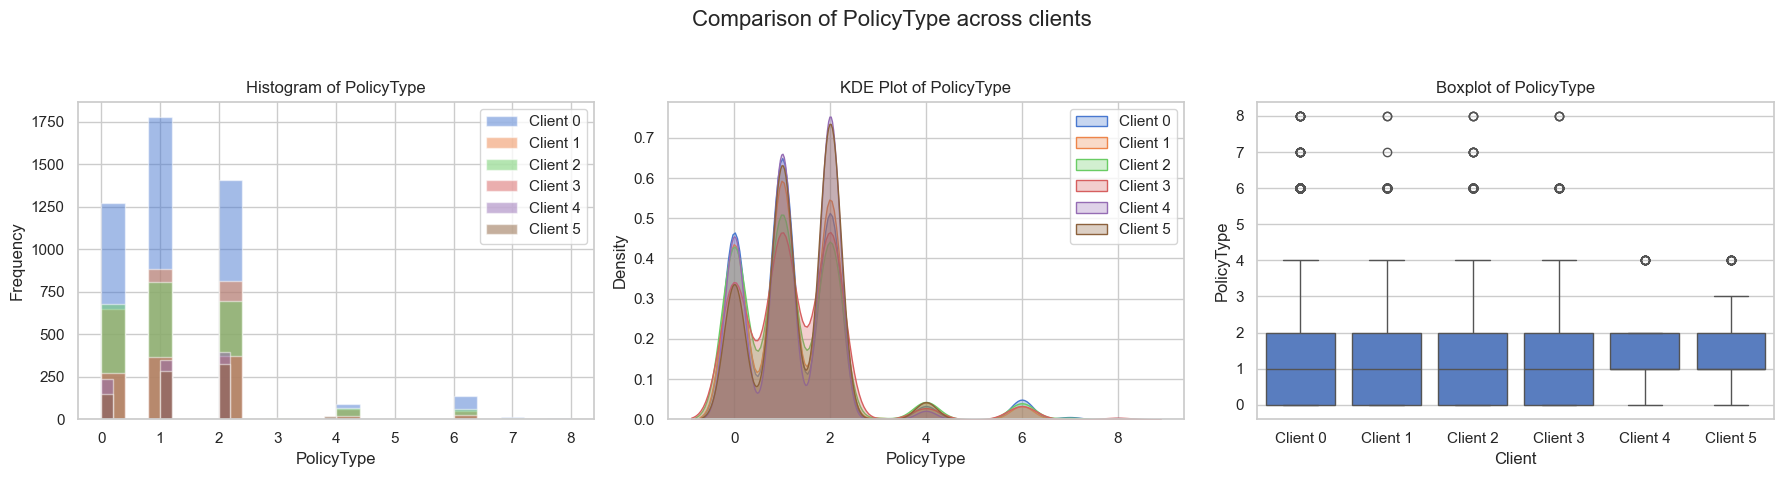

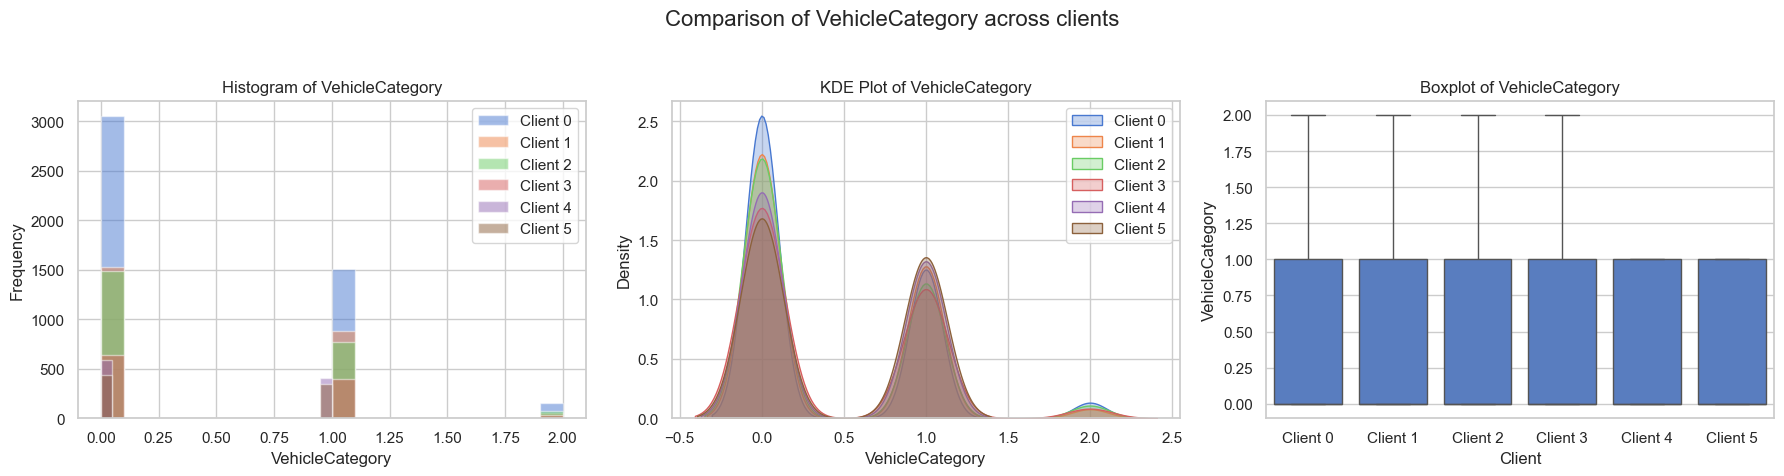

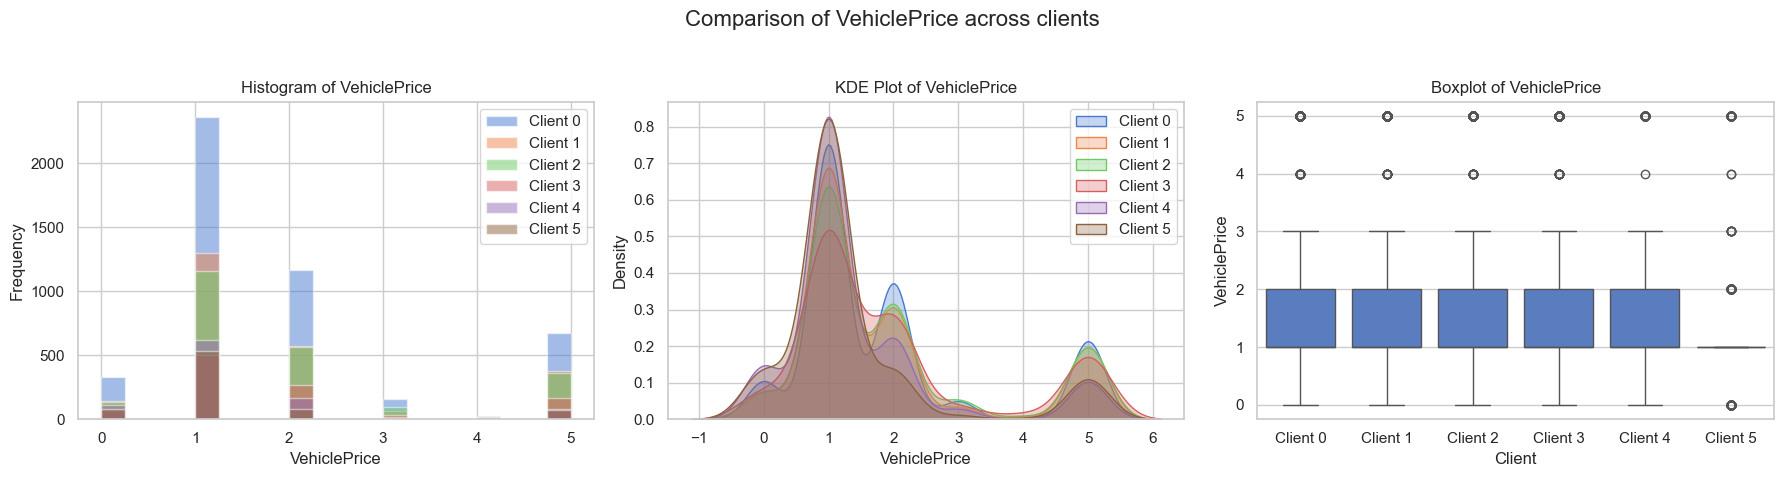

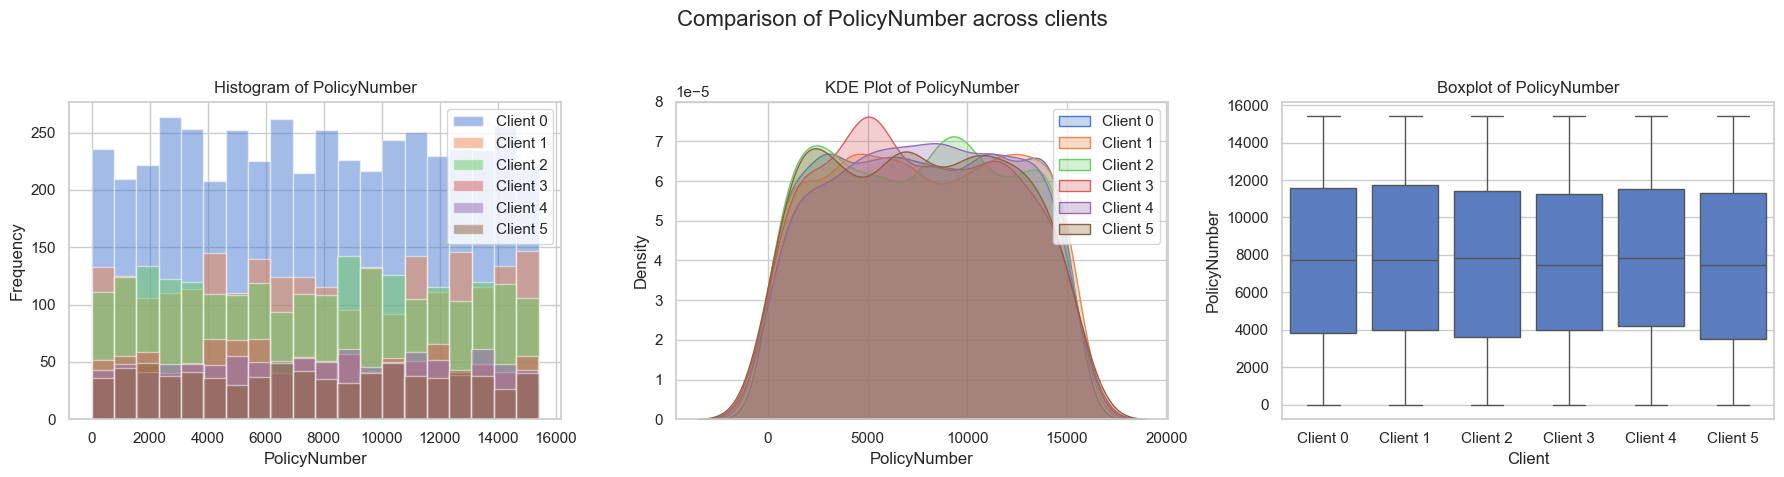

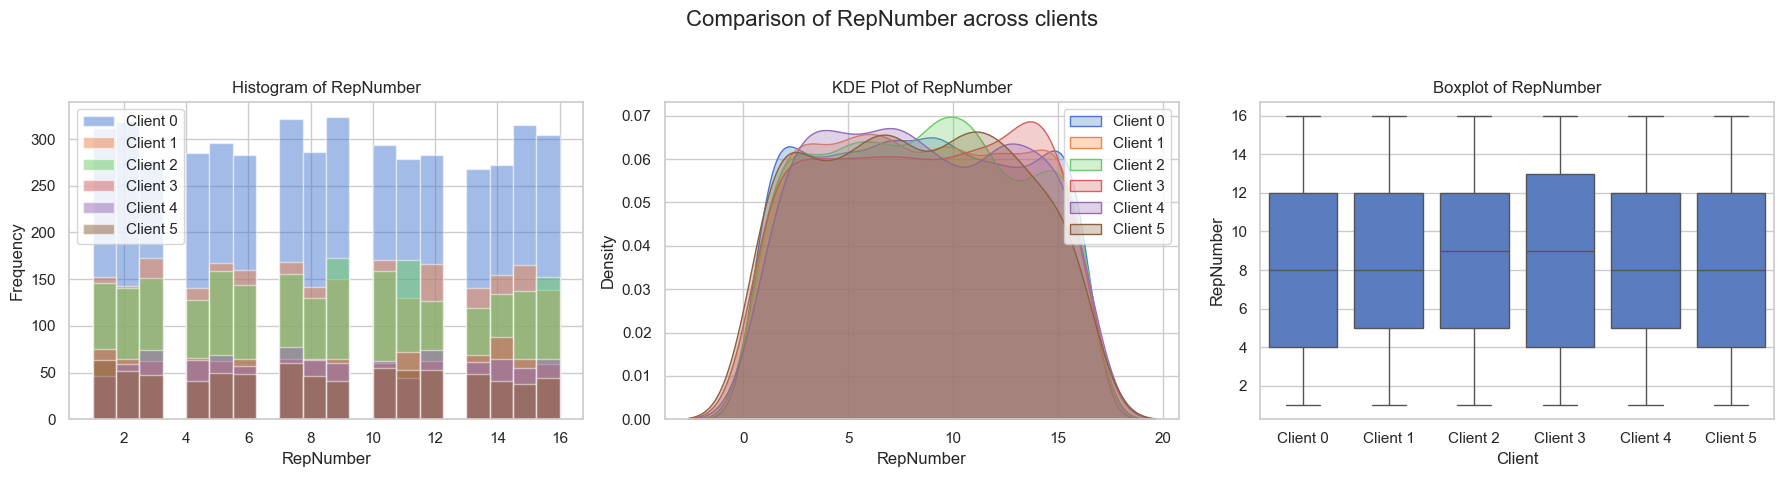

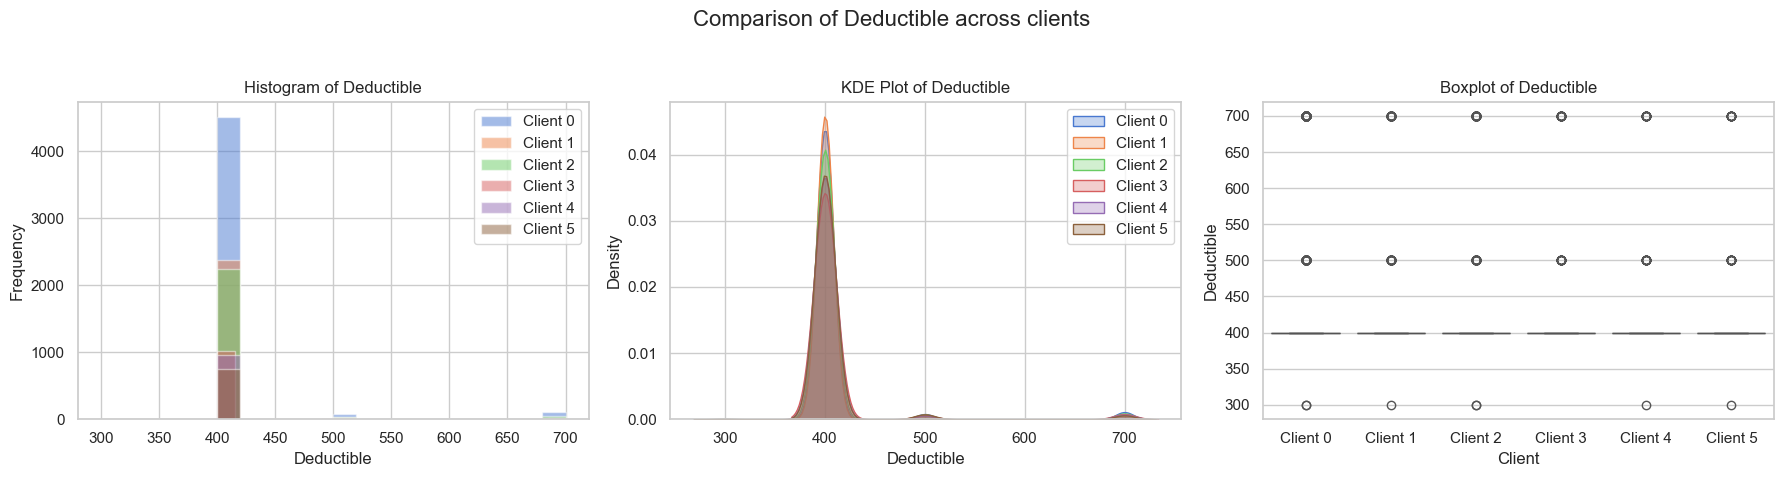

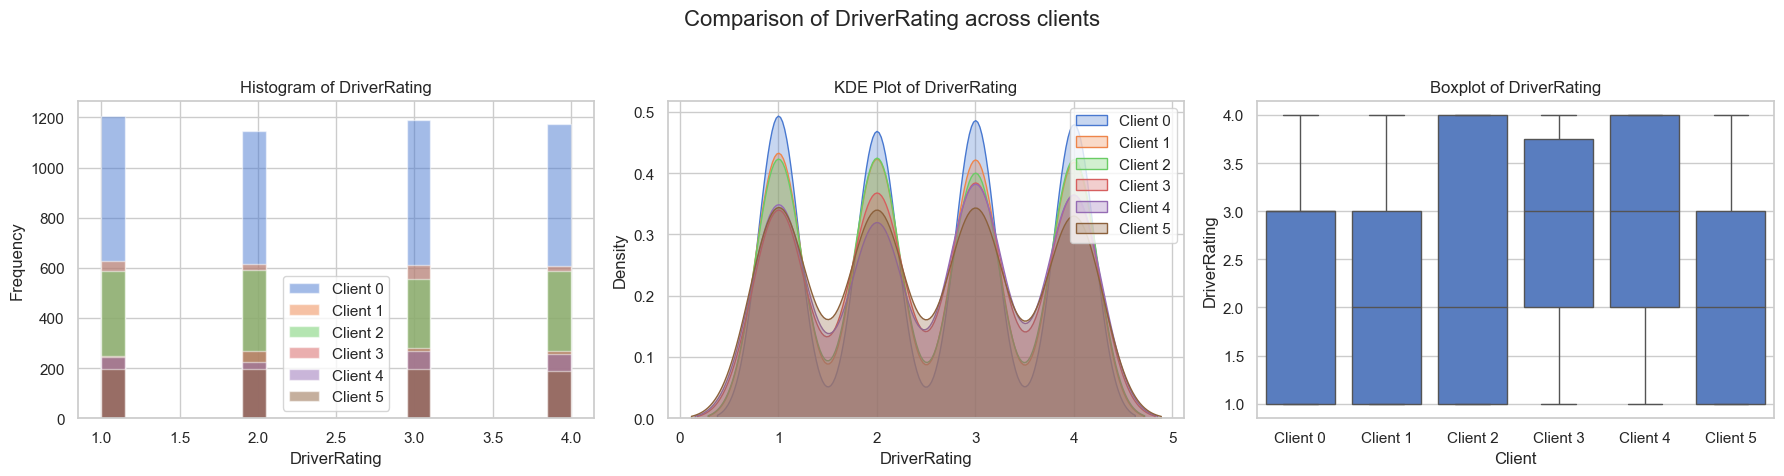

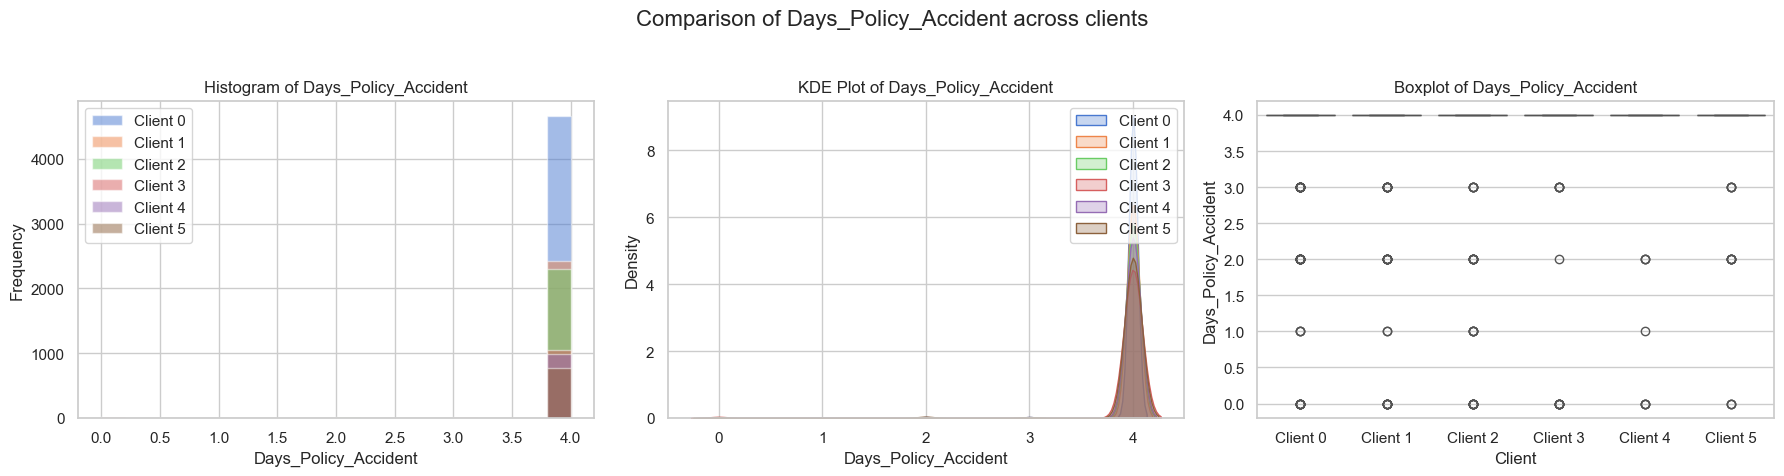

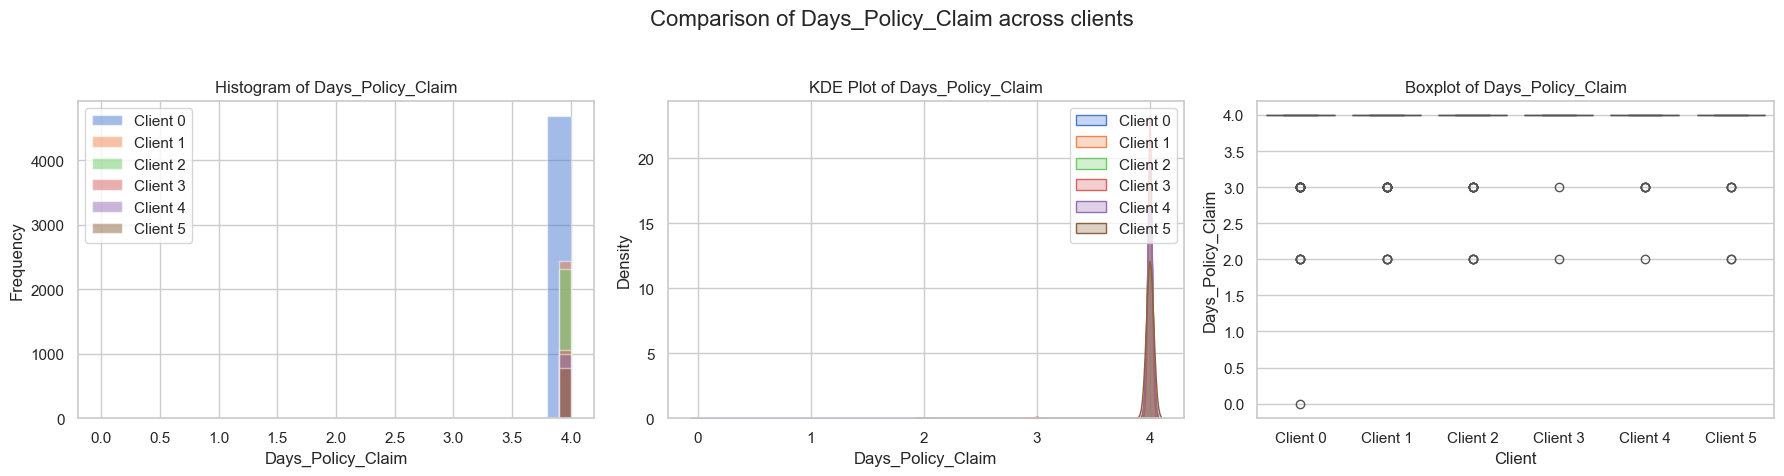

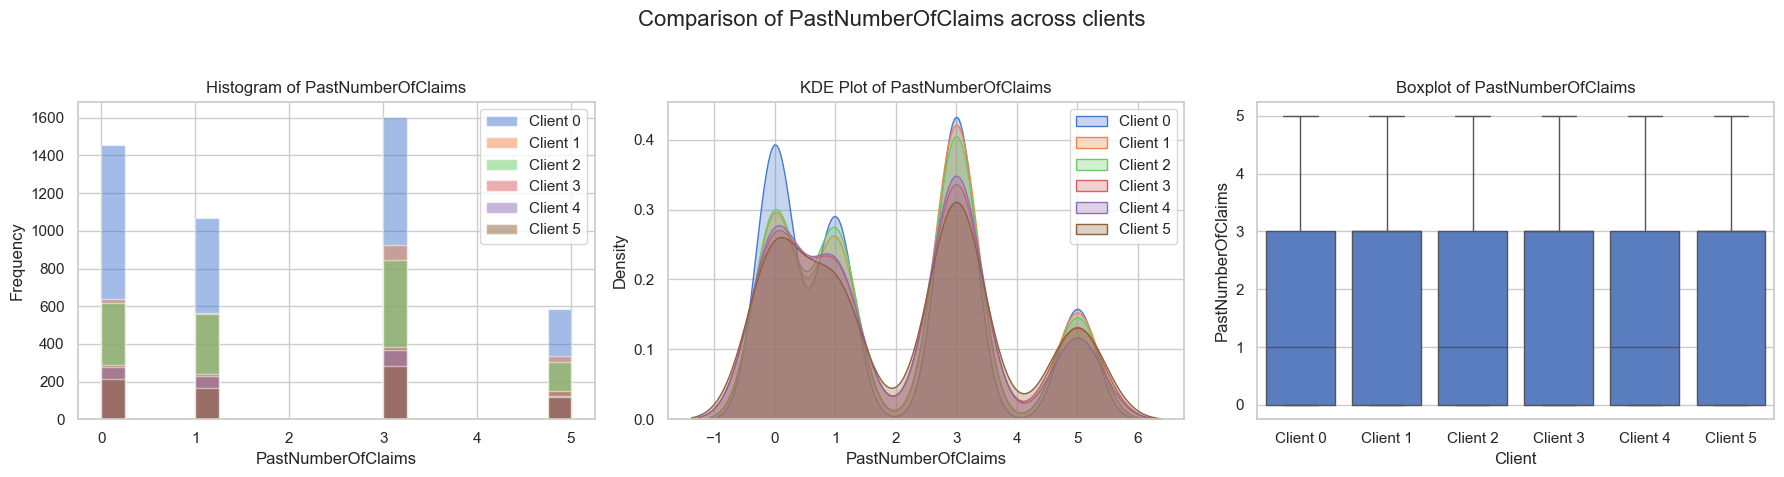

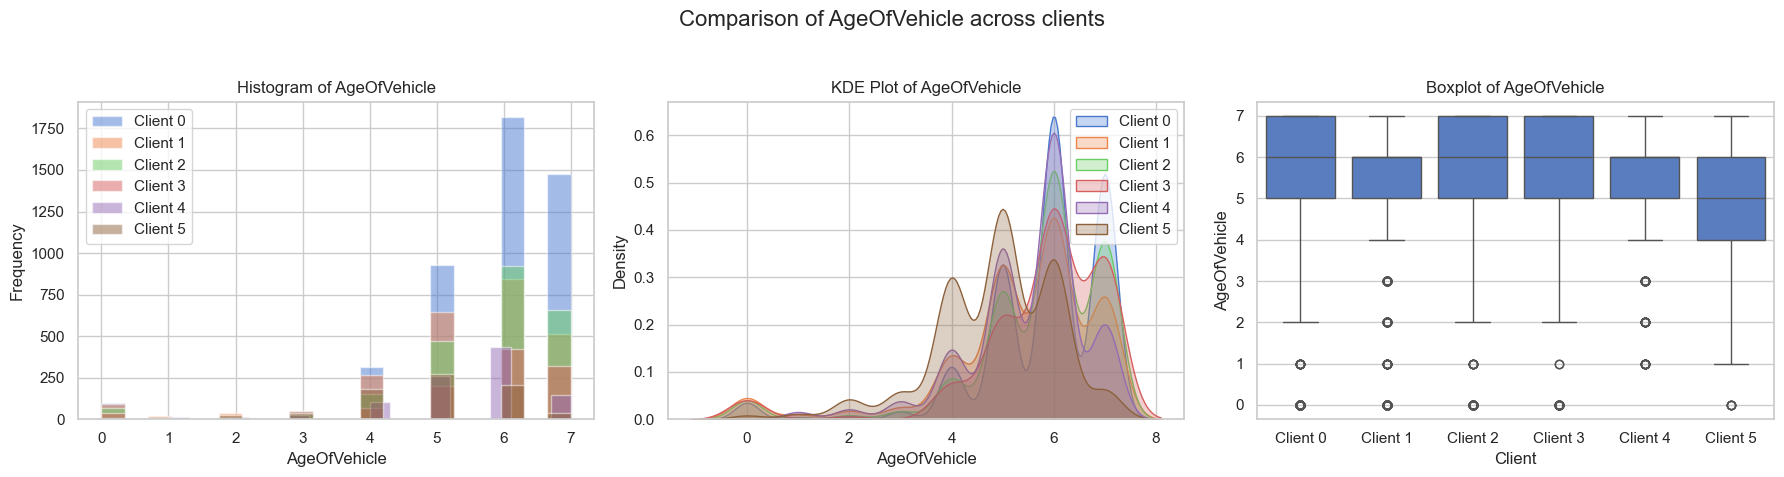

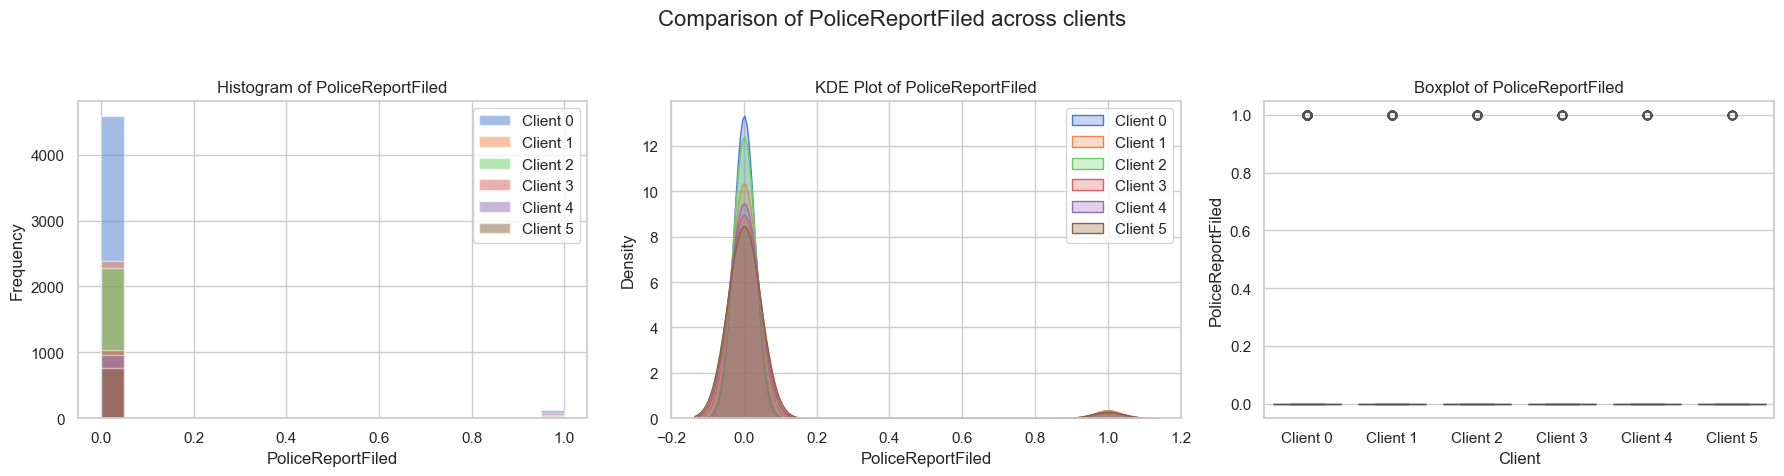

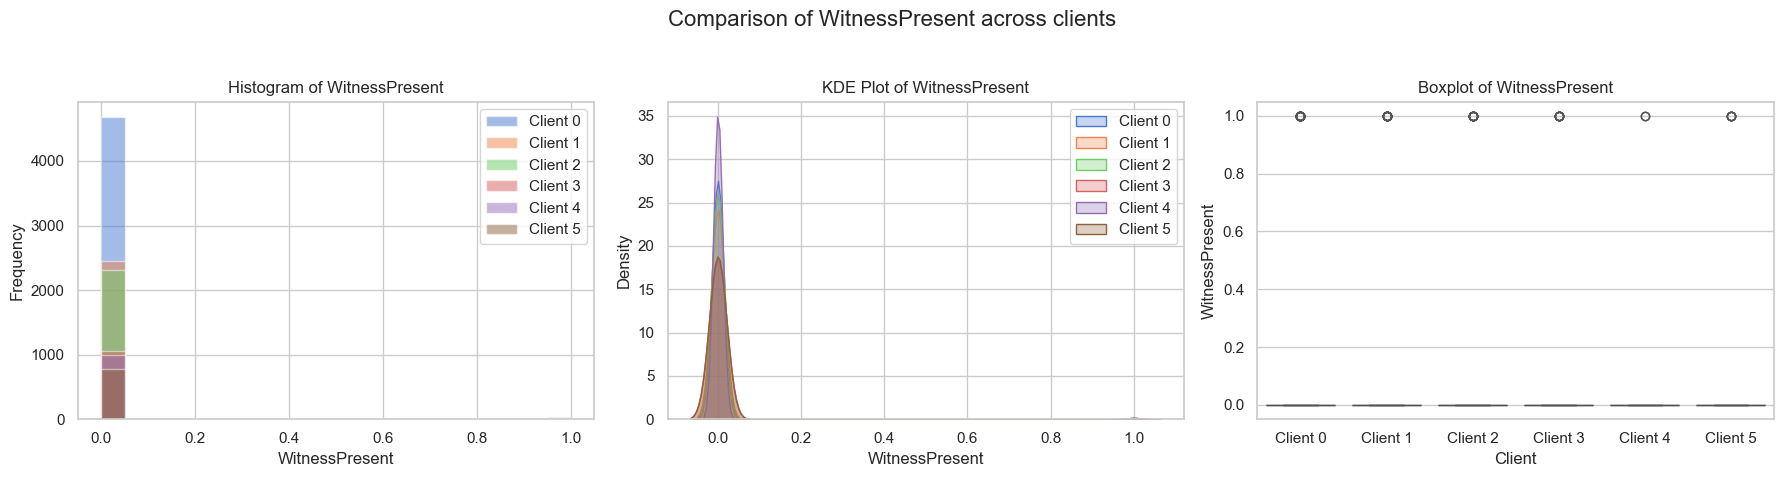

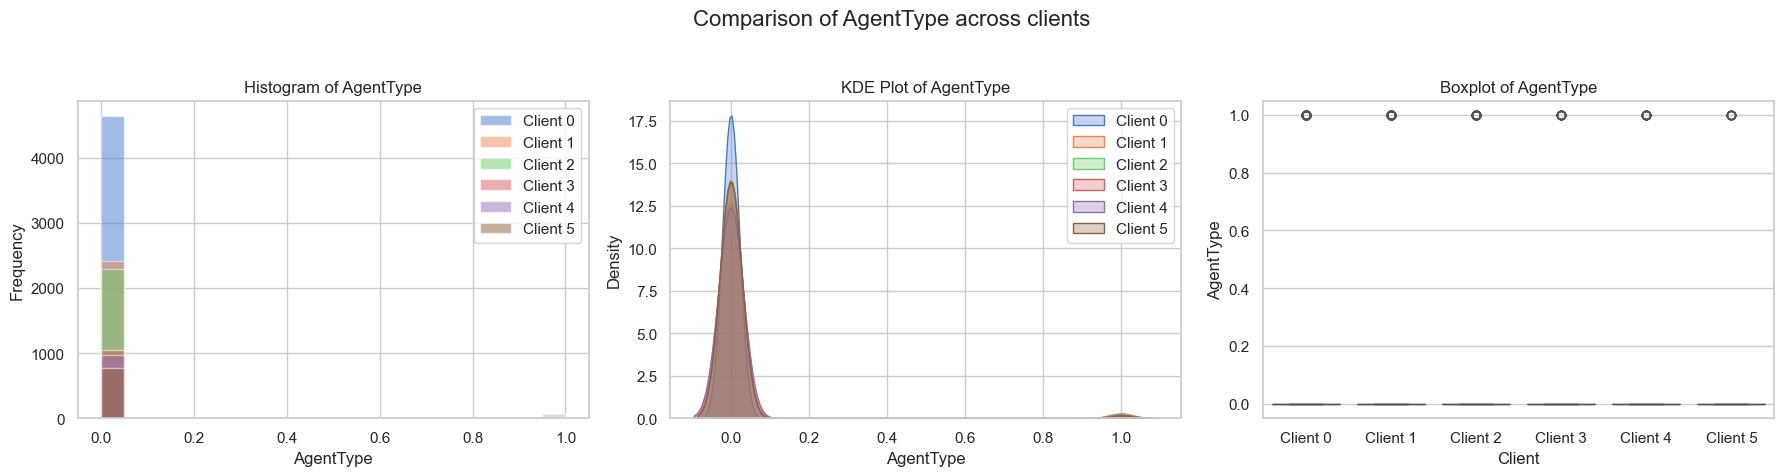

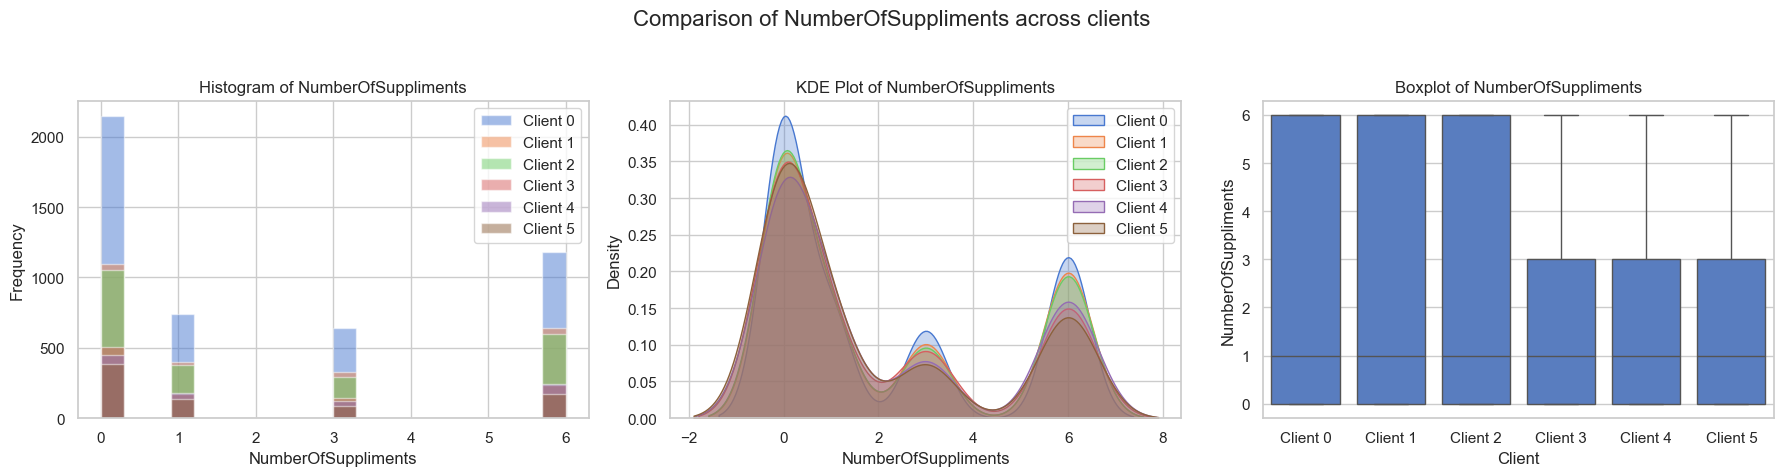

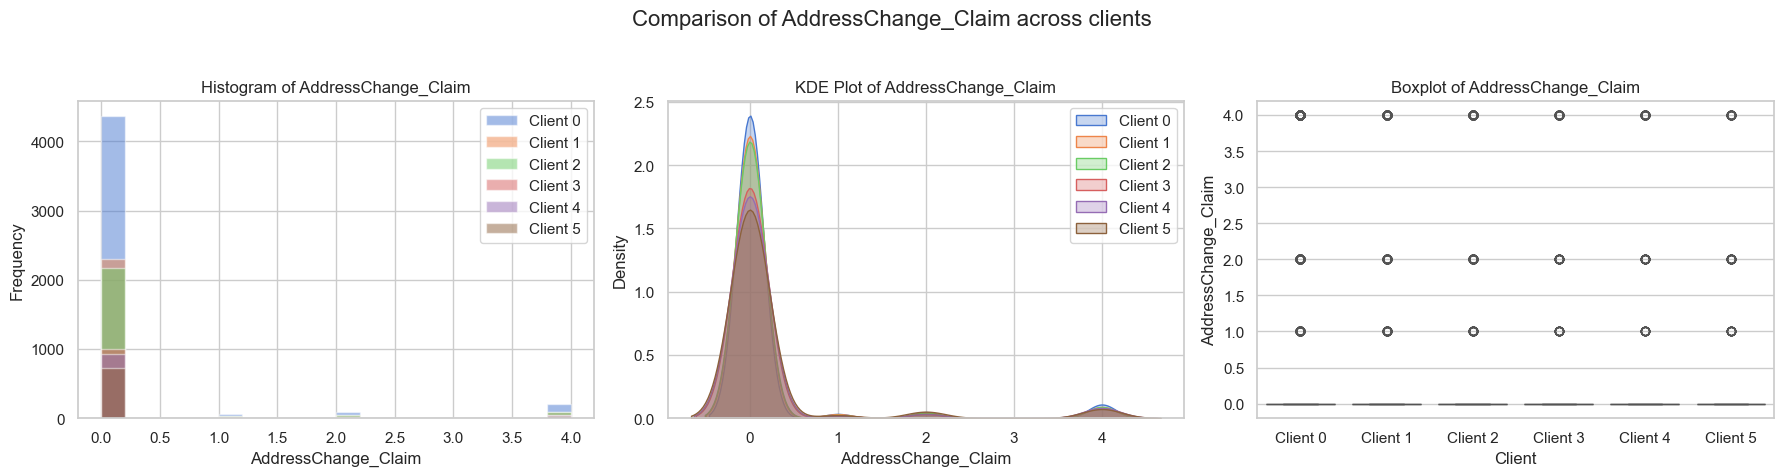

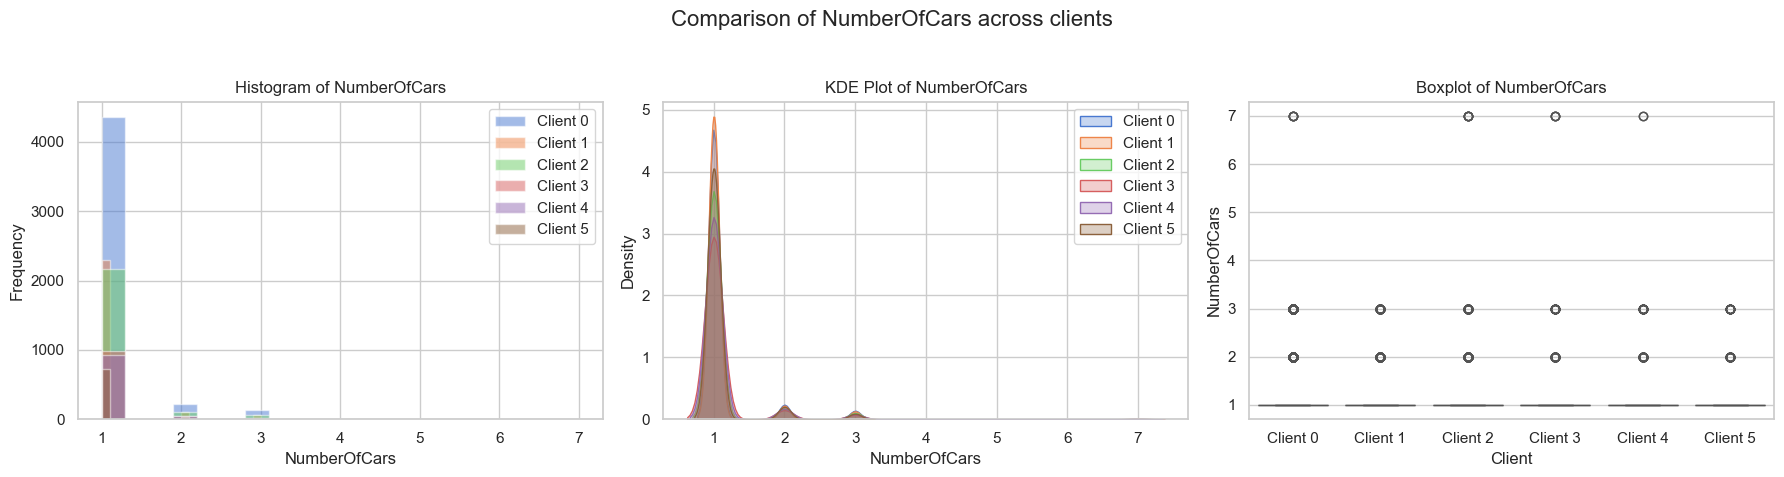

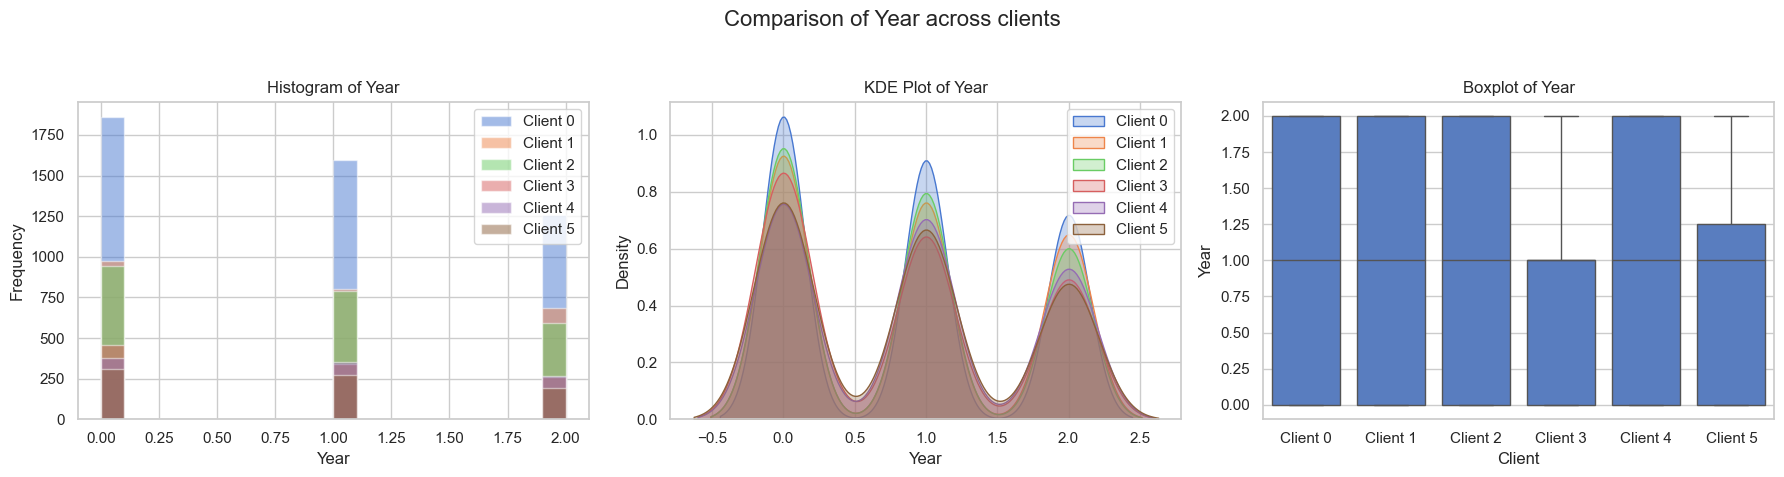

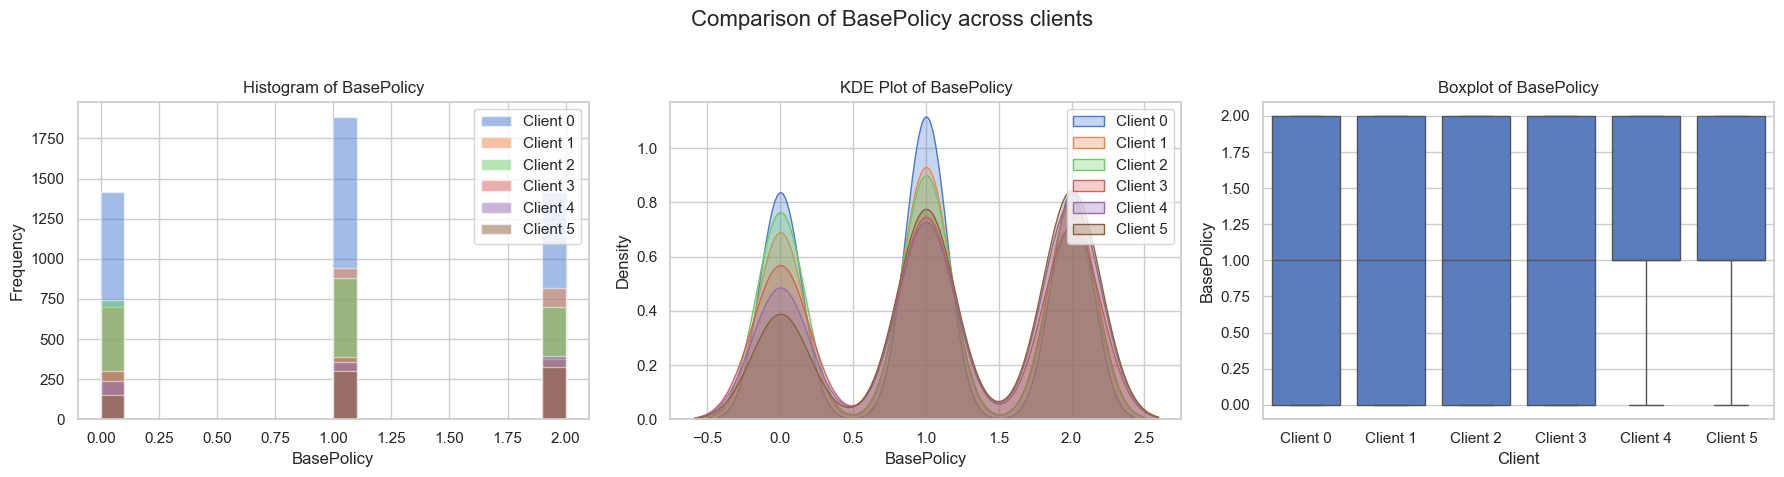

C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_12688\3977475188.py:1

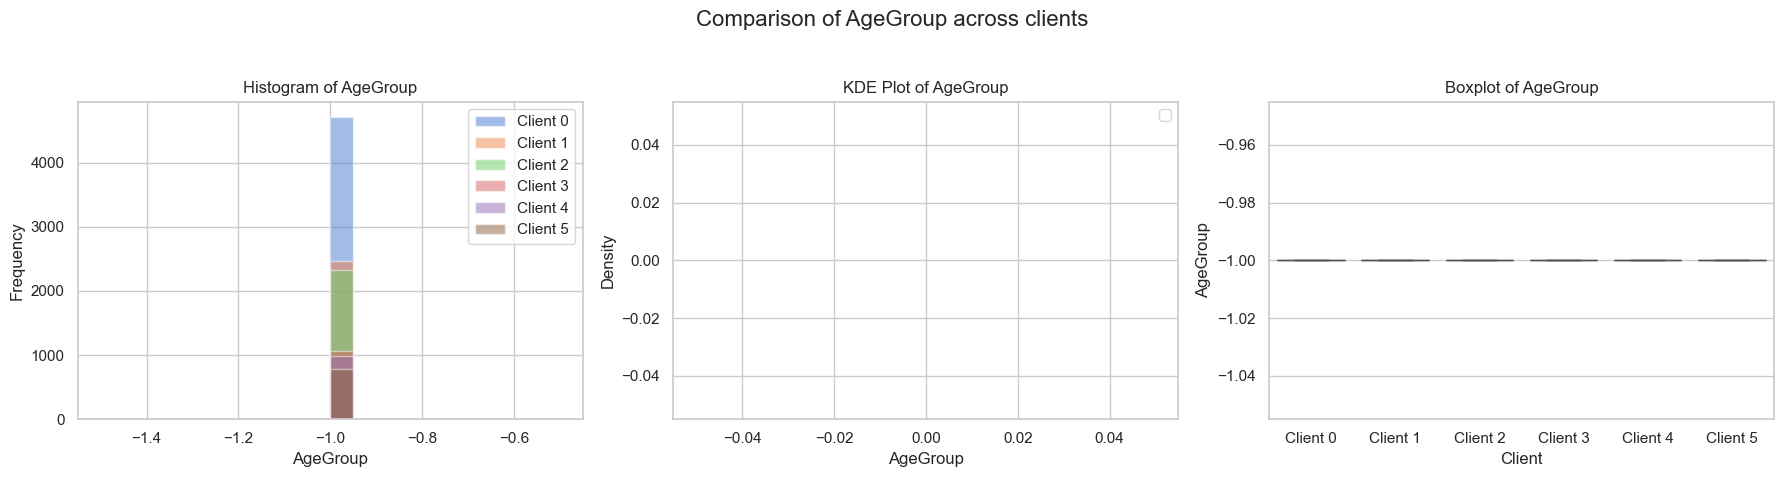

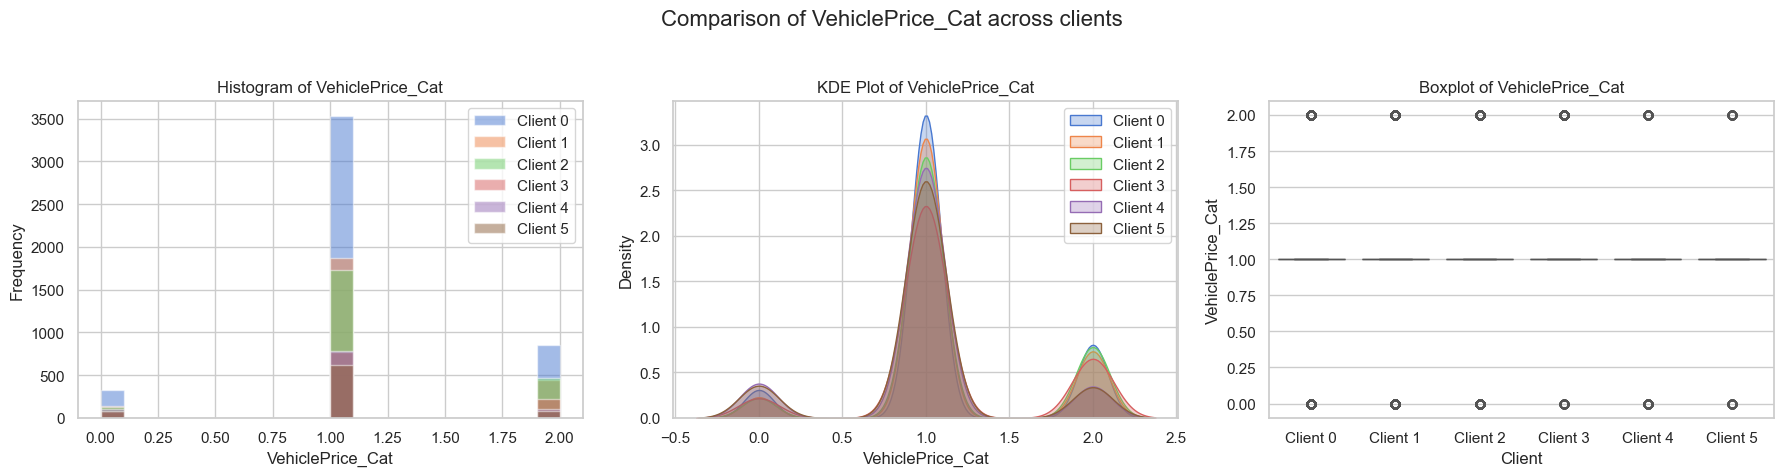

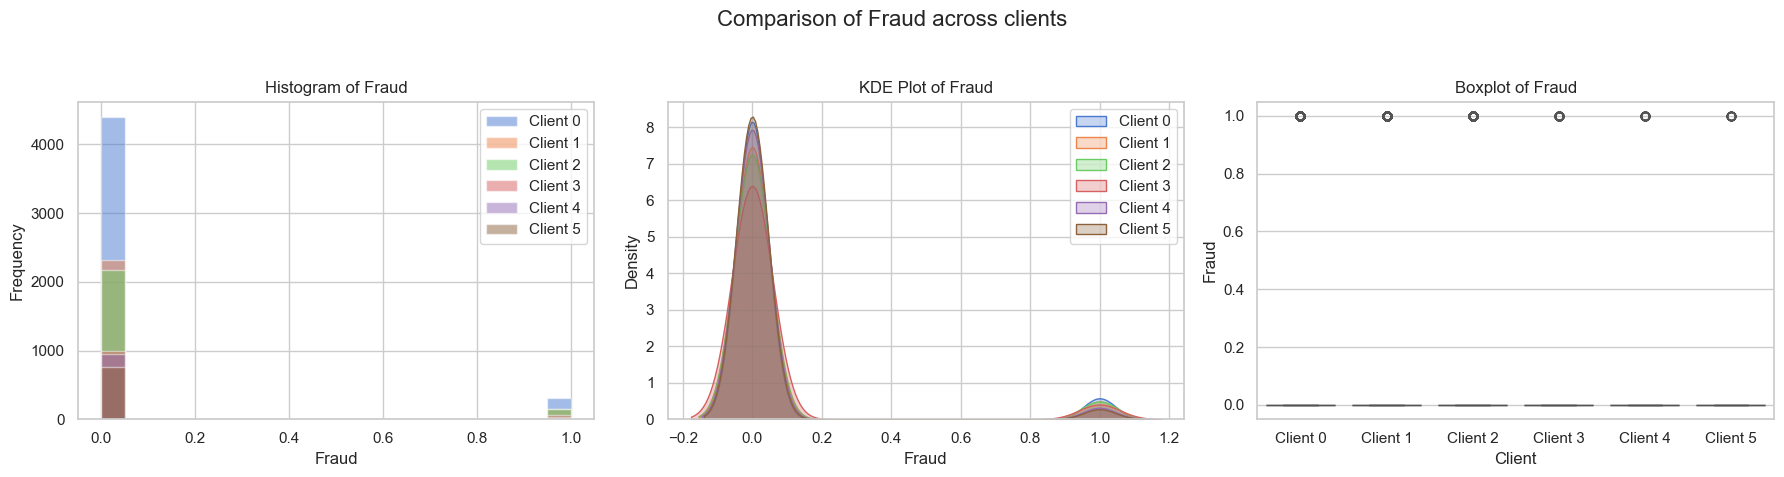

In [32]:
features = list(next(iter(client_datasets.values())).columns)
sns.set(style="whitegrid", palette="muted", color_codes=True)

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    [client_datasets[i][feature].hist(ax=axes[0], alpha=0.5, label=f'Client {i}', bins=20) for i in client_datasets]
    axes[0].set(title=f'Histogram of {feature}', xlabel=feature, ylabel="Frequency"); axes[0].legend()
    [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
    axes[1].set(title=f'KDE Plot of {feature}', xlabel=feature, ylabel="Density"); axes[1].legend()
    sns.boxplot(x='client', y=feature, data=pd.concat([client_datasets[i].assign(client=f'Client {i}') for i in client_datasets]), ax=axes[2])
    axes[2].set(title=f'Boxplot of {feature}', xlabel="Client", ylabel=feature)
    
    plt.suptitle(f'Comparison of {feature} across clients', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()